In [2]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import pandas as pd
#load data
dataSet = load_dataset('lukebarousse/data_jobs')
df = dataSet['train'].to_pandas()
#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


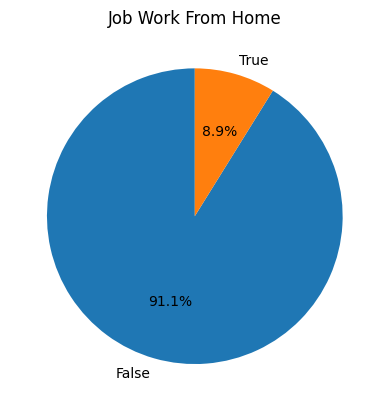

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Job Work From Home')
plt.ylabel('')
plt.show()

In [4]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


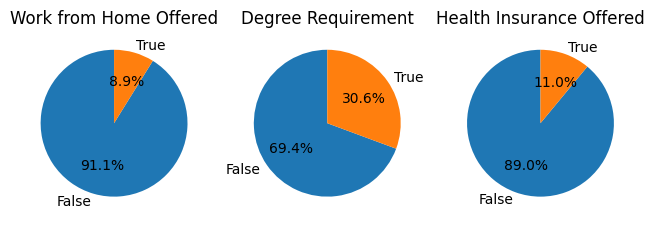

In [5]:
fif,ax=plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column,title )in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=[False,True])
    ax[i].set_title(title)

plt.tight_layout()

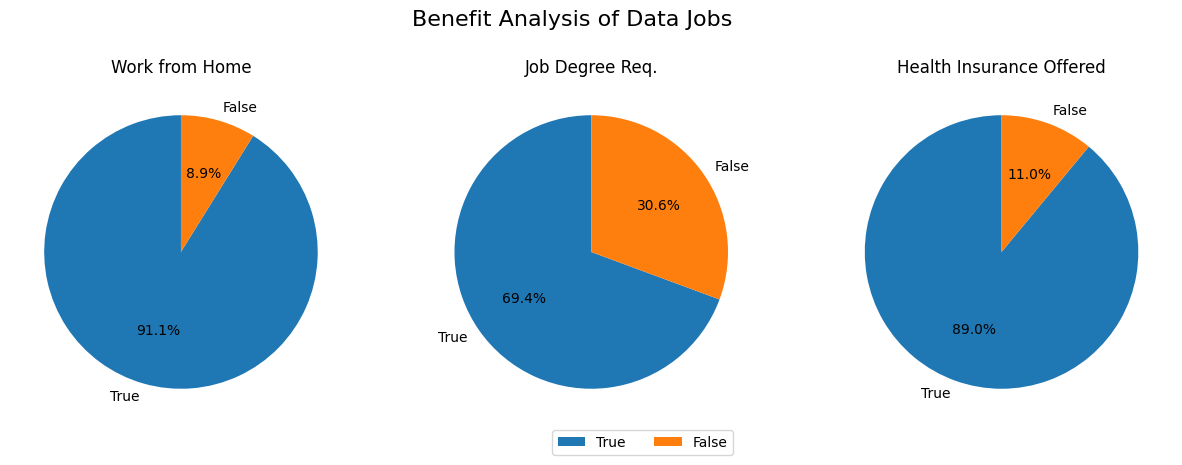

In [6]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(-0.55, 0), ncol=2)
plt.show()